In [1]:
import sys
import pickle
sys.path.append('..')    
from models import BaseDenseNet
from models import ConvDenseNet
from core import ImageGenerator
from utils.plot import *
from utils.model import *

%matplotlib inline

In [2]:
model = load_conv_dense_net('../state_dicts/eval/in_place_m20_conv_dense.pt', 20)
model.eval()

ConvDenseNet(
  (conv1): Conv2d (1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dense1): Sequential(
    (0): Bottleneck(
      (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True)
      (conv1): Conv2d (24, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d (48, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): Bottleneck(
      (bn1): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True)
      (conv1): Conv2d (36, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d (48, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (trans1): Transition(
    (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True)
    (conv1): Conv2d (48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (dense2): Sequential(
    (0): B

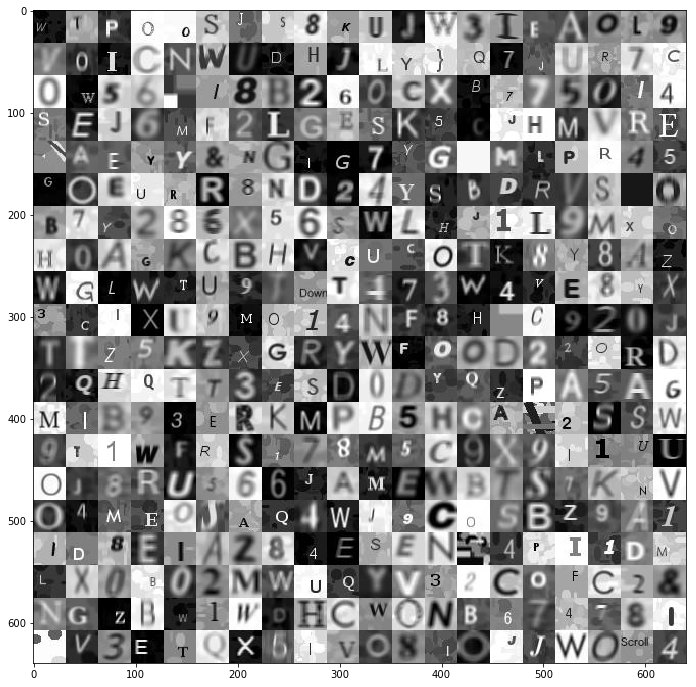

W
 
 
 
O
 
J
 
8
K
U
 
W
3
 
E
A
O
L
9


In [3]:
image_data = np.array(Image.open('../generators/in_place_generator.jpg'), dtype=np.float64)
plot_image(image_data, (16, 12))
image_data = image_data.reshape(1, 1, image_data.shape[0], image_data.shape[1])
output_data = get_output_data(model, image_data)
output_ind = np.argsort(output_data)
for i in range(20):
    print(encode_class(output_ind[i, -1]))

In [4]:
image = Image.open('../generators/in_place_generator.jpg')
chunked_data = create_chunked_data(image, 20)
chunked_data = chunked_data.reshape(-1, 1, 32, 32)
output_data = get_output_data(model, chunked_data)
output_ind = np.argsort(output_data)
for i in range(20):
    print(encode_class(output_ind[i, -1]))
    
def get_paded_image(image):
    pad_func = (lambda x: x if x % 32 == 0 else x - (x % 32) + 32)
    paded_image = np.zeros((pad_func(image.shape[0]), pad_func(image.shape[1])))
    paded_image[:image.shape[0], :image.shape[1]] = image
    return paded_image

def create_chunked_data(image, dim_chunk_count):
    dim_size = dim_chunk_count * 32
    if image.size[0] > image.size[1]:
        image = image.resize((dim_size, int(image.size[1] * float(dim_size) / image.size[0])))
    else:
        image = image.resize((int(image.size[0] * float(dim_size) / image.size[1]), dim_size))
    chunked_data = get_paded_image(np.array(image, dtype=np.float64))
    data_shape = chunked_data.shape
    chunked_data = np.split(chunked_data, data_shape[0] / 32)
    chunked_data = map(lambda x: np.split(x, data_shape[1] / 32, axis=1), chunked_data)
    return np.array(chunked_data)

W
T
P
O
O
S
J
S
8
K
U
J
W
3
I
E
A
O
L
9
